# Machine Learning in Practice 

### 3.1 High level description of FinTech firm


Sarunas Fintech firm is a small FinTech business that operates in the financial sector and primarily works in facilitating loans via an online platform. This platform makes use of several technologies to efficiently process the loan applications and make informed decisions.

###### The four structural parts of the business:

Streamlit User interface (UI) : The business makes use of a Streamlit-based US and offers applications a streamlined experience when submitting loan requests. This structural part of the business is important for the initial user engagement where essential financial details and personal details are gathered for loan evaluations.

FastAPI for risk modelling: The firm makes use of the FastAPI framework which uses a vigorous credit risk model. This model makes use of logistic regression to analyse loan application data which is collected through the UI. From here the probability of loan repayment is assessed taking note of certain criteria such as income and employment. 

Data management using Postgres: Utilising a Postgres database system for efficient data storage and retrieval, the business uses this to hold all of the information for the loan applications. THis database is also used to store assessment results.

Data Analysis on Juypterlab: By using Juypterlab for complex model refinement and data analytics, Sarunas fintech firm is able to examine collected data. This analysis allows for useful insights on applications and helps in improving the businesses credit risk model.

###### How do the structural parts of the business interact?

The process begins when users apply for loans using the Streamlit UI. From here, these applications are then processed by the FastAPI risk model by employing logistic regression for applicant risk assessment. The results from here are then stored in the Postgres database for safe-keeping. From here, Juypterlab is used to conduct further data analysis which helps to improve the risk model and decisions made by the business. 

###### What is logistic regression and why is it a useful machine learning technique?

Logistic regression is a  classification technique which works by estimating the likelihood of an input belonging to a particular class. Logistic regression is a linear method, but the predictions are transformed using the logistic function (Brownlee, 2016). It is extremely useful in machine learning as it is able to provide probability estimates of these outcomes therefore providing insight into how likely each group is. This method is unique due to its interpretability as it shows clearly how different predictors change the outcome. It is also effective with small datasets which makes it very versatile and can be used in multiple ways. (Brownlee, 2016)




In [96]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

**Data Taken From:** https://www.kaggle.com/wordsforthewise/lending-club </br>
**Model is From:** https://www.kaggle.com/benesalvatore/predict-default-using-logisitic-regression

In [97]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

In [98]:
a = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features+['loan_status'])

In [99]:
full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

In [100]:
full_set = full_set.dropna(subset=['emp_length'])

# Build the model - Logistic Regression

1. Transform our Label *loan_status* and other columns

In [101]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

In [102]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

**Build Model**

In [103]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

In [104]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

In [106]:
model = LogisticRegression()
scaler = MinMaxScaler()

In [107]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [108]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

**Test Model**

ROC-AUC-score:  0.634209472479741


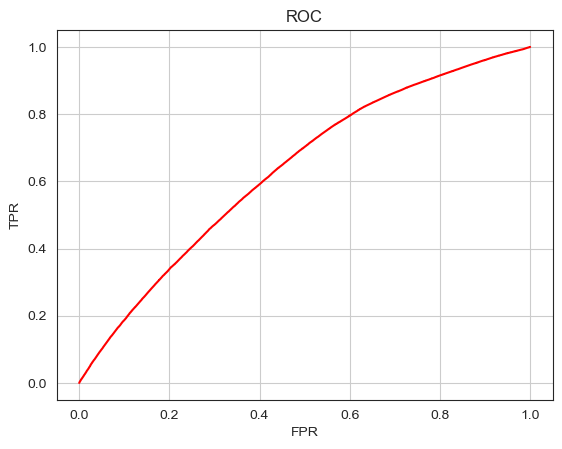

In [109]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [110]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [111]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [112]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

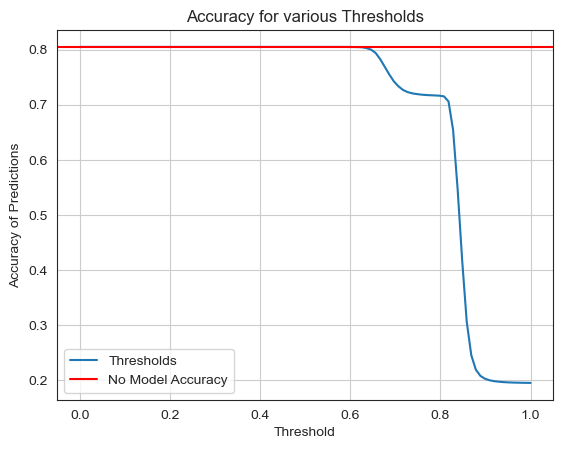

In [113]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [114]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7393148089674771

### 3.2 Written description of Python Code 



###### Line 1: a = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features+['loan_status'])
This line reads a compressed CSV file into a pandas DataFrame.

###### Line 2: full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()
This line is used to filter the DataFrame to include rows where the status of the loan is either 'Fully paid' or 'charged off'. After this it creates a copy of the filtered dataframe. 

###### Line 3: full_set['loan_status'] = full_set['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
In this line, the 'loan_status' columns format is changed into binary format. 'Fully paid' is replaced by 1 and 'charged off' is replaced by a 0

###### Line 4: X_train, X_test, y_train, y_test = train_test_split(full_set[model_features], full_set['loan_status'], random_state=42)
This line is used to split the dataset into testing sets and training sets. 'model features' acts as the predictors and 'loan status' as the response variable. 'random state' is used for reproducibility

###### Line 5: model = LogisticRegression()
This line of code represents a logistic regression model.

###### Line 6: pipeline = Pipeline([('scaler', scaler), ('model', model)])
This code creates a pipeline which scales the data by using a minmaxscaler. From here it then applies the logistic regression model.

###### Line 7: pipeline.fit(X_train, y_train)
This line trains the pipeline using the trraining data. The scaler normalises the features and the logisitic regression model is then used to predict the loan status

###### Line 8: fpr, tpr, thresholds = roc_curve(y_test, test_probas)
This line is used to calculate the false positive rate (fpr) true positive rate (tpr) and the threshold for the roc curve

###### Line 9: plt.plot(fpr, tpr, color='red')
This code is used to generate a plot of the ROC curve by using the false positive rate and true positive rate values. 'color=red' makes sure the curve is coloured red

###### Line 10: plt.show()
This code shows the plot that has been created and can be used to test all the previous commands. 

### 3.3 Build your own machine learning model


This code uses linear regression to look at historical closing prices of Amazons stock and attempt to predict the closing price for the next week.

Next weeks predicted closing price: 104.87655856412881
Next weeks actual closing price: 106.959999


C:\Users\phili\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


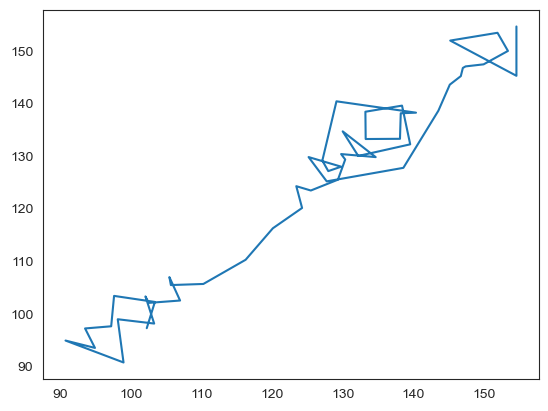

In [123]:

#load amazon historical dataset
historical_prices = pd.read_csv('AMZN.csv')

#adjust the dataset to use closing prices of stock 
X = historical_prices[['Close']].shift(-1)  
y = historical_prices['Close']
X.dropna(inplace=True)  
y = y.iloc[:-1]         

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create and train the linear regression model
amazon_model = LinearRegression()
amazon_model.fit(X_train, y_train)

#predict  next weeks closing price using the last data point 
last_week_price = X_test.iloc[-1].values.reshape(-1, 1)
predicted_price = model.predict(last_week_price)

actual_price = y_test.iloc[-1]
print(f"Next weeks predicted closing price: {predicted_price[0]}")
print(f"Next weeks actual closing price: {actual_price}")

plt.plot(X, y) #graph looked interesting but does not show anything valuable

Interpretation: The model predicts a closing price of 104.88 usd for next week, while the actual closing price is 106.96 usd , indicating a slightly underestimated prediction by the model

# References

Brownlee, J. (2016, September 22). Logistic Regression for Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/logistic-regression-for-machine-learning/